# Mann-Whitney U Test Criterion

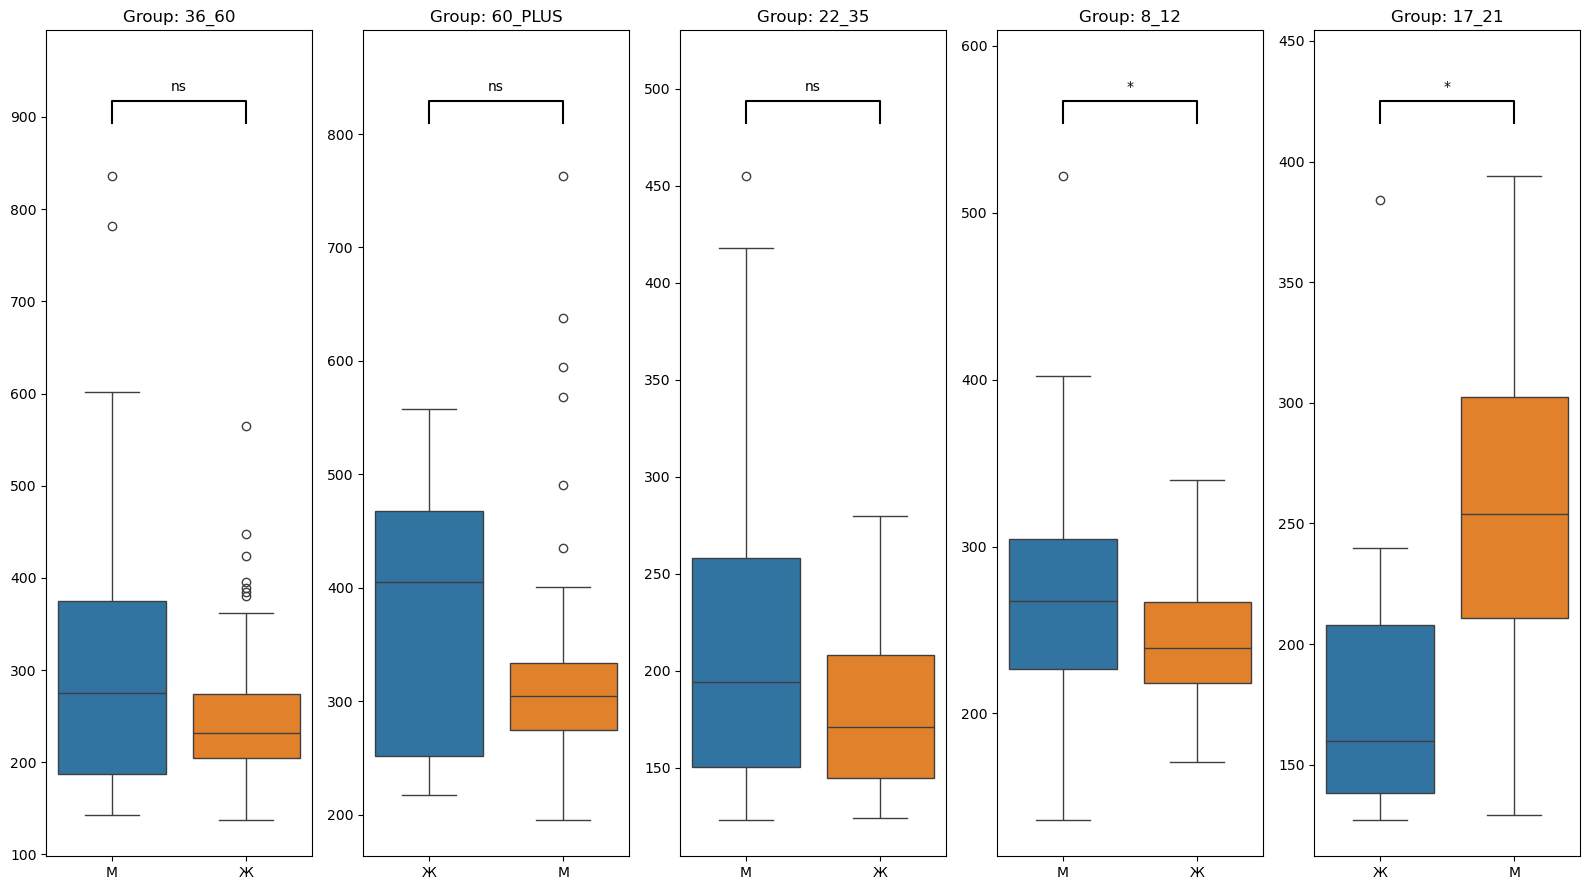

In [13]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import starbars
from scipy.stats import mannwhitneyu 

wr.filterwarnings('ignore')

# Loading and reading dataset
df = pd.read_excel("dataset_mental_report_new.xlsx")
df.drop(["Unnamed: 0"], axis=1, inplace=True)  # Deleted first column

# Calculating Mann-Whitney U for each age group, hue = gender
old_group_values = list(set(df['old_group'].tolist()))
alphas = []
groups_to_remove = []

for group in old_group_values:
    temp_df = df.loc[df['old_group'] == group]
    x = temp_df.query('gender == "М"')['stroop_duration']
    y = temp_df.query('gender == "Ж"')['stroop_duration']

    if x.empty or y.empty:
        groups_to_remove.append(group)
        continue

    stats, alpha = mannwhitneyu(x, y)
    alphas.append(alpha)

for group in groups_to_remove:
    old_group_values.remove(group)

# Создание DataFrame для групп и значений alpha
group_alpha_df = pd.DataFrame({'group': old_group_values, 'alpha': alphas})

# Сортировка значений по группам
group_alpha_df.sort_values(by='group', inplace=True)

# Построение графиков с аннотациями для каждой группы
plt.figure(figsize=(16, 9))
for i, row in group_alpha_df.iterrows():
    group = row['group']
    alpha = row['alpha']
    temp_df = df.loc[df['old_group'] == group]
    plt.subplot(1, len(group_alpha_df), i + 1)  # Настройка макета подграфиков
    ax = sns.boxplot(data=temp_df, x='gender', y='stroop_duration', hue='gender')
    plt.title(f'Group: {group}')
    plt.xlabel('')
    plt.ylabel('')
    # Добавление аннотаций
    annotation_text = f'p = {alpha:.3f}'
    x_coords = [0, 1]  # Позиции для гендерных групп
    y_max = max(temp_df['stroop_duration'])
    starbars.draw_annotation([(0, 1, alpha)], ax=ax) 

plt.tight_layout()
plt.show()
